<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2004%20-%20Multistep%20Methods/4_Problem_Sheet/401a_Problem_Sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Sheet Question 6 Solution

The general 2 step Adams-Bashforth method for the first order differential equation
\begin{equation} y^{'} = f(t,y), \end{equation}
numerical approximates $y$ the at time point $t_i$ as $w_i$
with the  formula:
\begin{equation} w_{i+1}=w_i+\frac{h}{2}\big[3f(t_i,w_i)-f(t_{i-1},w_{i-1})\big],\end{equation}
for $i=0,...,N-1$, where 

and $h$ is the stepsize.


In [2]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

## The Equation

\begin{equation}   \tau_m\frac{dV}{dt} = -(V-E_L) + R_mI(t), \ \ -50\leq t \leq 400, \end{equation}

where $E_L = -75$, $\tau_m = 10$,
$R_m = 10$ and $I(t)=0.01t$
and the initial condition
$V(-50) = -75$ using a stepsize of $h=0.5$.
    
    
## Discrete Interval
The continuous time $a\leq t \leq b $ is discretised with stepsize $h=0.5$ gives
\begin{equation} 
N=\frac{b-a}{h}.
\end{equation}
Here the N is $-50\leq t \leq 400$ 
\begin{equation}
 N=\frac{400--50}{0.5}=900,
\end{equation}
this gives the 901 discrete points:
\begin{equation}
 t_0=-400, \ t_1=-399.5, \ ... t_{900}=400. 
\end{equation}
This is generalised to 
\begin{equation}
t_i=-50+i0.1, \ \ \ i=0,1,...,900.
\end{equation}
The plot below shows the discrete time steps.

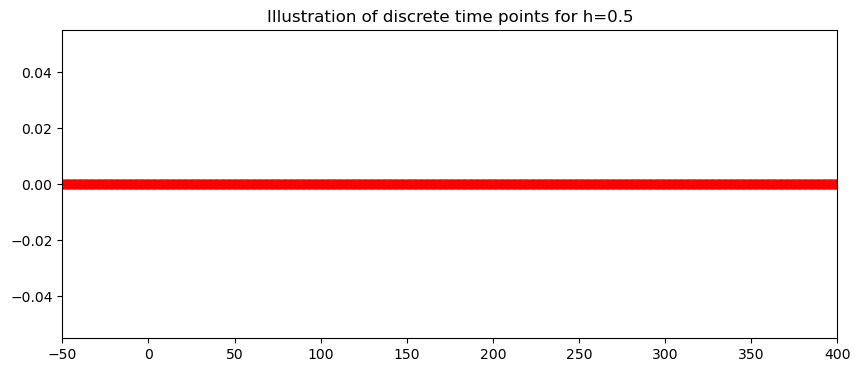

In [3]:
### Setting up time
a=-50
b=400
h=0.5


N=int((b-a)/(h))
time=np.arange(a,b+h/2,h)
fig = plt.figure(figsize=(10,4))
plt.plot(time,0*time,'o:',color='red')
plt.xlim((a,b))
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.plot();

## Difference Equation 

\begin{equation} w_{i+1}=w_i+\frac{h}{2}\big[3f(t_i,w_i)-f(t_{i-1},w_{i-1})\big],\end{equation}
for $i=0,...,N-1$, where 
where
\begin{equation}f(t_i,w_i)=\frac{-(w_i-E_L) + R_mI(t_i)}{\tau_m},\end{equation}

for $i=1,...,899$ and where $E_L = -75$, $\tau_m = 10$,
$R_m = 10$ and $I(t_i)=0.01t_i$
and the initial condition
$V(t_0=-50) = -75$ using a stepsize of $h=0.5$.
Putting in the values the difference equation is 
\begin{equation}w[i+1]=w[i]+\frac{0.5}{2}[3\frac{-(w[i]+75) + 0.1*time[i]}{10}-\frac{-(w[i-1]+75) + 0.1*time[i-1]}{10}] \end{equation}
we need an extra point so
\begin{equation}w[1]=w[0]+0.5\frac{-(w[0]+75) + 0.1*time[0]}{10} \end{equation}


In [4]:
def myfun_f(t,V):
    return (-(V+75)+0.1*t)/10

In [5]:
w=np.zeros(N+1)
w[0]=-75
w[1]=w[0]+h*myfun_f(time[0],w[0])
for i in range (1,N):
    w[i+1]=w[i]+h/2*(3*myfun_f(time[i],w[i])-myfun_f(time[i-1],w[i-1]))


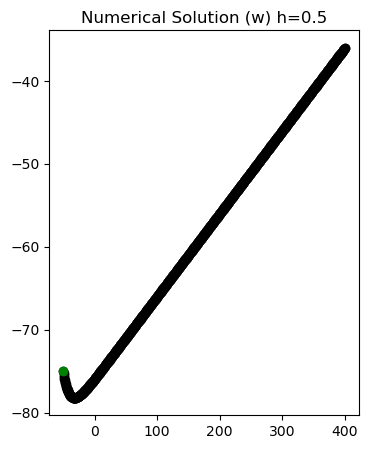

In [6]:
fig = plt.figure(figsize=(4,5))
# --- left hand plot
#ax = fig.add_subplot(1,4,1)
plt.plot(time,w,'o:',color='k')
plt.plot(time[0],w[0],'o',color='green')


#ax.legend(loc='best')
plt.title('Numerical Solution (w) h=%s'%(h))
plt.show()


In [7]:

d = {'time t_i': time,      '2-step AB (w_i) ':w}
df = pd.DataFrame(data=d)
df

,time t_i,2-step AB (w_i)
0,-50.0,-75.000000
1,-49.5,-75.250000
2,-49.0,-75.477500
3,-48.5,-75.691688
4,-48.0,-75.892998
...,...,...
896,398.0,-36.200000
897,398.5,-36.150000
898,399.0,-36.100000
899,399.5,-36.050000
